In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime as dt

In [2]:
df = pd.read_csv("../activities.csv")
df.columns=df.columns.str.lower()

In [3]:
df.shape

(69, 94)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 94 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   activity id                   69 non-null     int64  
 1   activity date                 69 non-null     object 
 2   activity name                 69 non-null     object 
 3   activity type                 69 non-null     object 
 4   activity description          0 non-null      float64
 5   elapsed time                  69 non-null     int64  
 6   distance                      69 non-null     float64
 7   max heart rate                0 non-null      float64
 8   relative effort               0 non-null      float64
 9   commute                       69 non-null     bool   
 10  activity private note         0 non-null      float64
 11  activity gear                 0 non-null      float64
 12  filename                      69 non-null     object 
 13  athlete

In [5]:

#Create new dataframe with only columns I care about
cols = ['activity id', 'activity date', 'activity type', 'elapsed time', 'moving time', 'distance',   
         'max heart rate', 'elevation gain', 'max speed', 'calories'
       ]
df = df[cols] 
df

,activity id,activity date,activity type,elapsed time,moving time,distance,max heart rate,elevation gain,max speed,calories
0,8438505192,"Jan 23, 2023, 12:31:15 PM",Run,2898,2155.0,3.57,NaN,18.008358,3.739990,NaN
1,8443784789,"Jan 24, 2023, 11:51:54 AM",Run,4732,3806.0,7.26,NaN,35.437153,4.365003,NaN
2,8449021783,"Jan 25, 2023, 10:45:17 AM",Run,3738,2413.0,5.09,NaN,21.168802,6.604053,NaN
3,8476783009,"Jan 30, 2023, 2:42:59 PM",Run,1811,1594.0,3.11,NaN,16.948460,4.730029,NaN
4,8490951726,"Feb 2, 2023, 2:01:48 AM",Run,2719,2717.0,3.62,NaN,0.000000,4.338000,NaN
...,...,...,...,...,...,...,...,...,...,...
64,11625168616,"Jun 11, 2024, 9:26:30 AM",Run,723,683.0,1.73,NaN,33.065662,4.356000,NaN
65,12124570495,"Aug 12, 2024, 1:22:44 AM",Run,1662,1527.0,2.46,NaN,15.922089,3.885998,NaN
66,12254398228,"Aug 27, 2024, 11:32:58 AM",Run,571,540.0,1.12,NaN,22.618277,3.968018,NaN
67,12538925217,"Sep 30, 2024, 10:55:10 AM",Run,721,618.0,1.22,NaN,26.635899,5.444995,NaN


In [6]:
df.dtypes


activity id         int64
activity date      object
activity type      object
elapsed time        int64
moving time       float64
distance          float64
max heart rate    float64
elevation gain    float64
max speed         float64
calories          float64
dtype: object

In [7]:
#Break date into start time and date
df['activity_date'] = pd.to_datetime(df['activity date'])
df['start_time'] = df['activity_date'].dt.time
df['start_date_local'] = df['activity_date'].dt.date
df['month'] = df['activity_date'].dt.month_name()
df['year'] = df['activity_date'].dt.year
df['year'] = (df['year']).astype(np.object) #change year from numeric to object
df['dayofyear'] = df['activity_date'].dt.dayofyear
df['dayofyear'] = pd.to_numeric(df['dayofyear'])
df.head(3)

C:\Users\ariop\AppData\Local\Temp\ipykernel_8276\2209012716.py:7: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df['year'] = (df['year']).astype(np.object) #change year from numeric to object


,activity id,activity date,activity type,elapsed time,moving time,distance,max heart rate,elevation gain,max speed,calories,activity_date,start_time,start_date_local,month,year,dayofyear
0,8438505192,"Jan 23, 2023, 12:31:15 PM",Run,2898,2155.0,3.57,NaN,18.008358,3.739990,NaN,2023-01-23 12:31:15,12:31:15,2023-01-23,January,2023,23
1,8443784789,"Jan 24, 2023, 11:51:54 AM",Run,4732,3806.0,7.26,NaN,35.437153,4.365003,NaN,2023-01-24 11:51:54,11:51:54,2023-01-24,January,2023,24
2,8449021783,"Jan 25, 2023, 10:45:17 AM",Run,3738,2413.0,5.09,NaN,21.168802,6.604053,NaN,2023-01-25 10:45:17,10:45:17,2023-01-25,January,2023,25


In [8]:
#convert distance from object to numeric
df['distance'] = pd.to_numeric(df['distance'], errors = 'coerce')

In [9]:
#Create extra columns to create metrics which aren't in the dataset already
df['elapsed minutes'] = df['elapsed time'] /60 
df['km per hour'] = df['distance'] / (df['elapsed minutes'] / 60)
df['avg pace'] = df['elapsed minutes'] / df['distance']

In [10]:
df['activity type'].value_counts()


activity type
Run     55
Walk    13
Ride     1
Name: count, dtype: int64

In [11]:
runs = df[df['activity type'] == 'Run']
runs = runs[runs['distance'] <= 500]
runs = runs[runs['elevation gain'] <= 750]
runs = runs[runs['elapsed minutes'] <= 300]
runs = runs[runs['year'] >= 2018]

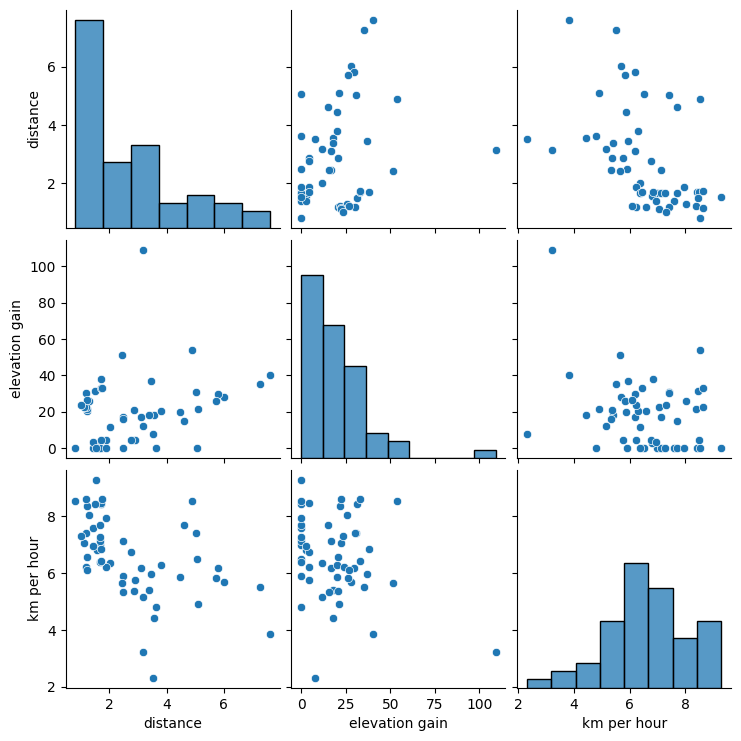

In [12]:
pp_df = runs[['distance', 'elevation gain', 'km per hour']]
sns.pairplot(pp_df)

In [13]:
runs.describe().round(0)

,activity id,elapsed time,moving time,distance,max heart rate,elevation gain,max speed,calories,activity_date,dayofyear,elapsed minutes,km per hour,avg pace
count,5.500000e+01,55.0,55.0,55.0,0.0,55.0,55.0,0.0,55,55.0,55.0,55.0,55.0
mean,9.889719e+09,1733.0,1512.0,3.0,NaN,19.0,5.0,NaN,2023-09-16 16:29:26.290909440,146.0,29.0,7.0,10.0
min,8.438505e+09,342.0,339.0,1.0,NaN,0.0,3.0,NaN,2023-01-23 12:31:15,23.0,6.0,2.0,6.0
25%,8.636857e+09,722.0,662.0,2.0,NaN,3.0,4.0,NaN,2023-02-28 07:48:42.500000,56.0,12.0,6.0,8.0
50%,9.748129e+09,1142.0,1070.0,2.0,NaN,18.0,4.0,NaN,2023-08-30 09:41:54,129.0,19.0,7.0,9.0
75%,1.111648e+10,2232.0,2062.0,4.0,NaN,27.0,5.0,NaN,2024-04-05 23:53:26.500000,232.0,37.0,8.0,10.0
max,1.281153e+10,7137.0,6913.0,8.0,NaN,109.0,13.0,NaN,2024-11-03 10:49:22,362.0,119.0,9.0,26.0
std,1.244157e+09,1396.0,1250.0,2.0,NaN,19.0,1.0,NaN,NaN,99.0,23.0,1.0,3.0


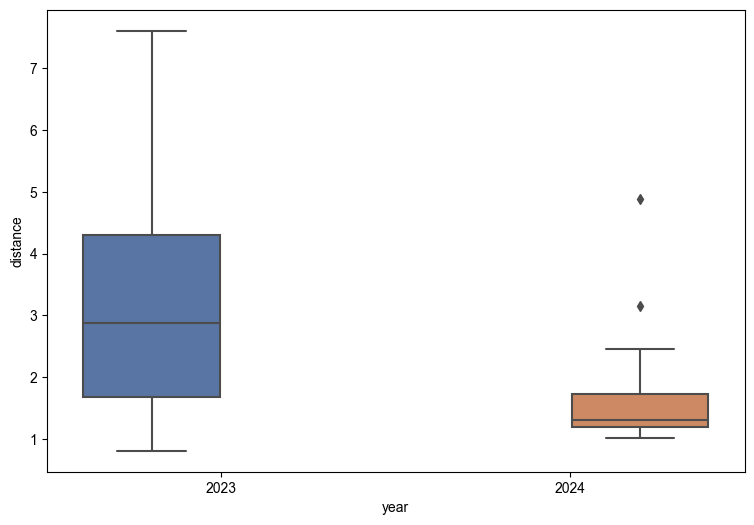

In [14]:
fig, ax = plt.subplots()
sns.set(style="whitegrid", font_scale=1)
sns.boxplot(x="year", y="distance", hue="year", data=runs)
ax.legend_.remove()
plt.gcf().set_size_inches(9, 6)

C:\Users\ariop\AppData\Local\Temp\ipykernel_8276\852183388.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='month', y='distance', data=runs, hue='year', ci=None, estimator=np.sum, palette = 'hot',


''

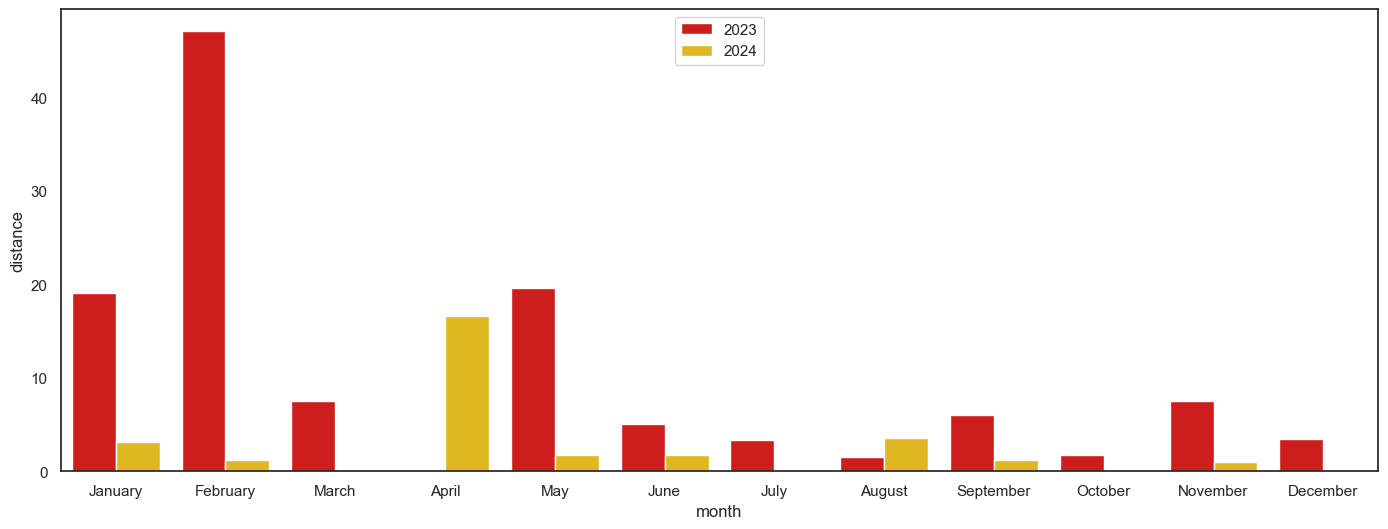

In [15]:
sns.set_style('white')
sns.barplot(x='month', y='distance', data=runs, hue='year', ci=None, estimator=np.sum, palette = 'hot',
           order =["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"])
plt.gcf().set_size_inches(17, 6)
plt.legend(loc='upper center')
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper right', borderaxespad=0)
;

In [16]:
runs['season'] = 'unknown'
runs.loc[(runs["month"].isin(["March", "April", "May"])), 'season'] = 'Spring'
runs.loc[(runs["month"].isin(["June", "July", "August"])), 'season'] = 'Summer'
runs.loc[(runs["month"].isin(["September", "October", "November"])), 'season'] = 'Autumn'
runs.loc[(runs["month"].isin(["December", "January", "February"])), 'season'] = 'Winter'

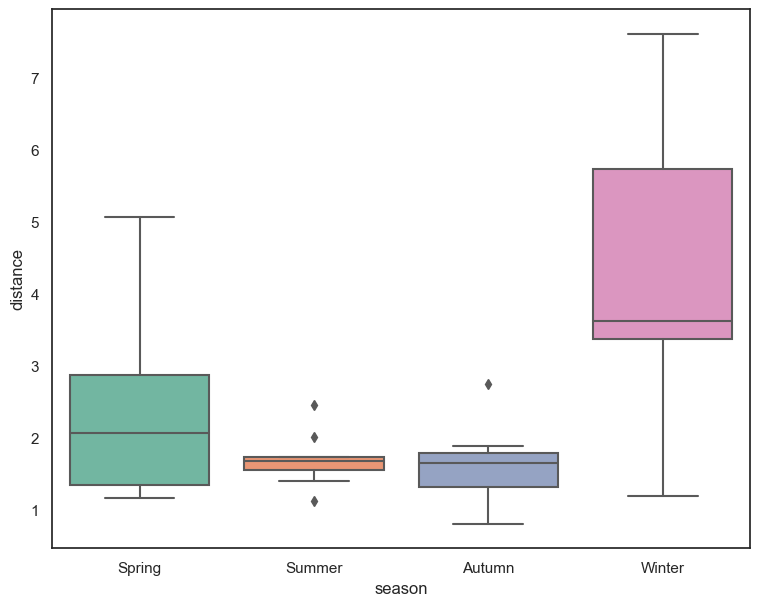

In [17]:
ax = sns.boxplot(x="season", y="distance", palette="Set2",
                    data=runs,
                    order =["Spring", 'Summer', 'Autumn', 'Winter'])
plt.gcf().set_size_inches(9, 7)